# Analysis
In this notebook, the computed data is loaded and analyzed. We look at total correlations between PEI and event size parameters with our computed delta values representing the ecosystem response. We further do a continent-wise analysis.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
from xcube.core.store import new_data_store
import os
from datetime import date, timedelta
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon
from shapely.ops import nearest_points
from shapely.geometry import Point
from collections import Counter
import seaborn as sns
from mpl_toolkits.basemap import Basemap

# 1. Load precomputed results

In [2]:
## Load difference dataframes on ecosystem variables

# Create relative path
current_directory = os.getcwd() # Get the current script's directory

data_directory = os.path.join(current_directory, '..', 'data/') # Construct the path to the data directory

file_path_fluxcom = os.path.join(data_directory, 'fluxcom_preprocessed_corearea.csv') # Construct the path to the output file #TRY BOTH AND COMPARE
file_path_gleam = os.path.join(data_directory, 'gleam_preprocessed_corearea.csv') # Construct the path to the output file

df_fluxcom = pd.read_csv(file_path_fluxcom)
df_gleam = pd.read_csv(file_path_gleam)

## Plot world map for gpp, ter, evs

For a first visual impression, we plot some maps of the spatial and temporal global distribution of the extreme events and their respective ecosystem response variables.

In [26]:
df_fluxcom['start_time'] = pd.to_datetime(df_fluxcom['start_time'])
df_fluxcom['year'] = df_fluxcom['start_time'].dt.year
df_gleam['start_time'] = pd.to_datetime(df_gleam['start_time'])
df_gleam['year'] = df_gleam['start_time'].dt.year

/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


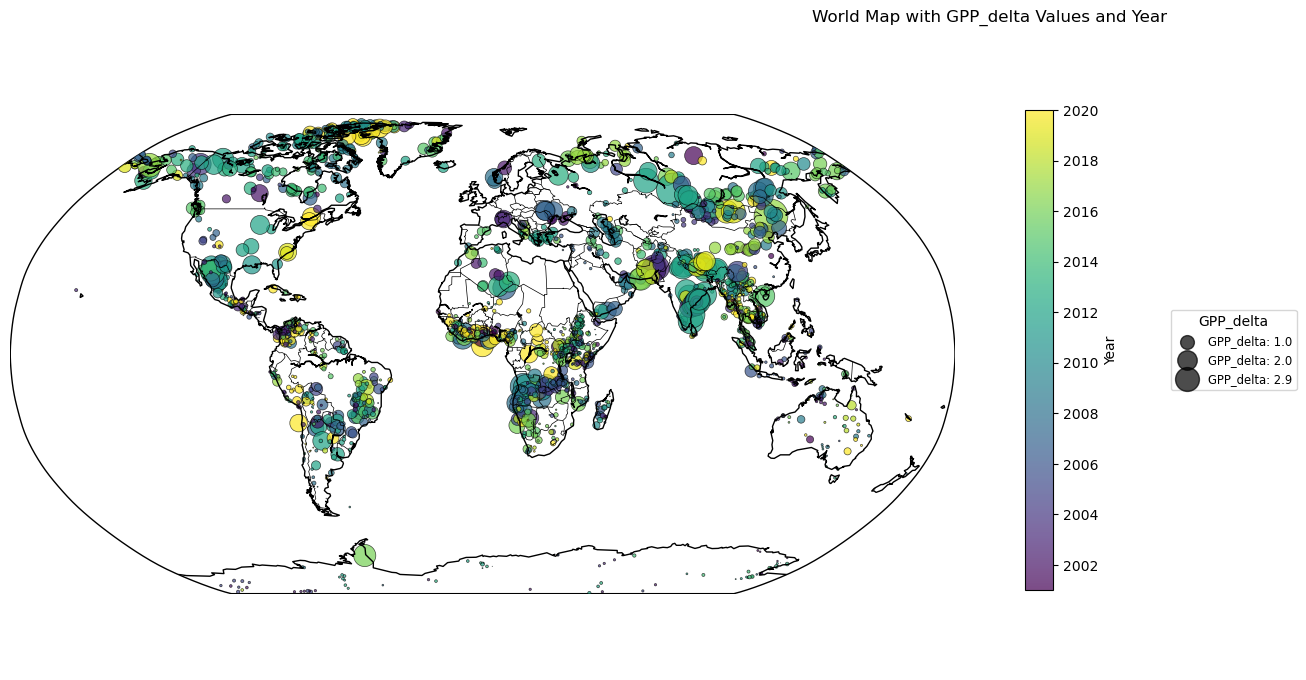

In [28]:
# Set up the figure and Basemap
plt.figure(figsize=(14, 8))  # Increase figure width for better space
m = Basemap(projection='robin', lon_0=0, resolution='c')

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Prepare the data
x, y = m(df_fluxcom['longitude_min'].values, df_fluxcom['latitude_min'].values)
sizes = df_fluxcom['GPP_delta'] * 200  # Scale sizes for better visibility
colors = df_fluxcom['year']
cmap = plt.get_cmap('viridis')

# Scatter plot
scatter = m.scatter(x, y, c=colors, s=sizes, cmap=cmap, alpha=0.7, edgecolor='k', linewidth=0.5)

# Create a custom axes for the color bar
cbar_ax = plt.axes([0.85, 0.2, 0.02, 0.6])  # Adjust the position: [left, bottom, width, height]

# Add color bar with custom axes
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Year')

# Set color bar ticks to 2-year intervals
years = np.arange(2002, 2022, 2)
cbar.set_ticks(years)
cbar.set_ticklabels([str(year) for year in years])

# Determine max size and steps for size legend
max_gpp = df_fluxcom['GPP_delta'].max()
step_size = max_gpp / 3  # Divide max GPP value into 3 steps

# Size legend values
size_values = [max_gpp / 3, max_gpp / 3 * 2, max_gpp]  # Example: base size values, including max
sizes_legend = [val * 100 for val in size_values]  # Scale sizes for legend

# Create a new axis for the size legend
legend_ax = plt.axes([0.7, 0.1, 0.25, 0.8])  # Create a new axis for the legend
legend_ax.set_xlim(0, 1)
legend_ax.set_ylim(0, 1)
legend_ax.axis('off')  # Hide the axis

# Add the size legend to the new axis
for size, label in zip(sizes_legend, size_values):
    legend_ax.scatter([], [], c='k', alpha=0.7, s=size, label=f'GPP_delta: {label:.1f}')

legend_ax.legend(title='GPP_delta', loc='center left', bbox_to_anchor=(1, 0.5), scatterpoints=1, fontsize='small')

# Adjust layout to make room for the color bar and size legend
plt.subplots_adjust(right=0.8)  # Adjust right margin to accommodate the color bar

# Show plot
plt.title('World Map with GPP_delta Values and Year')
plt.show()

/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


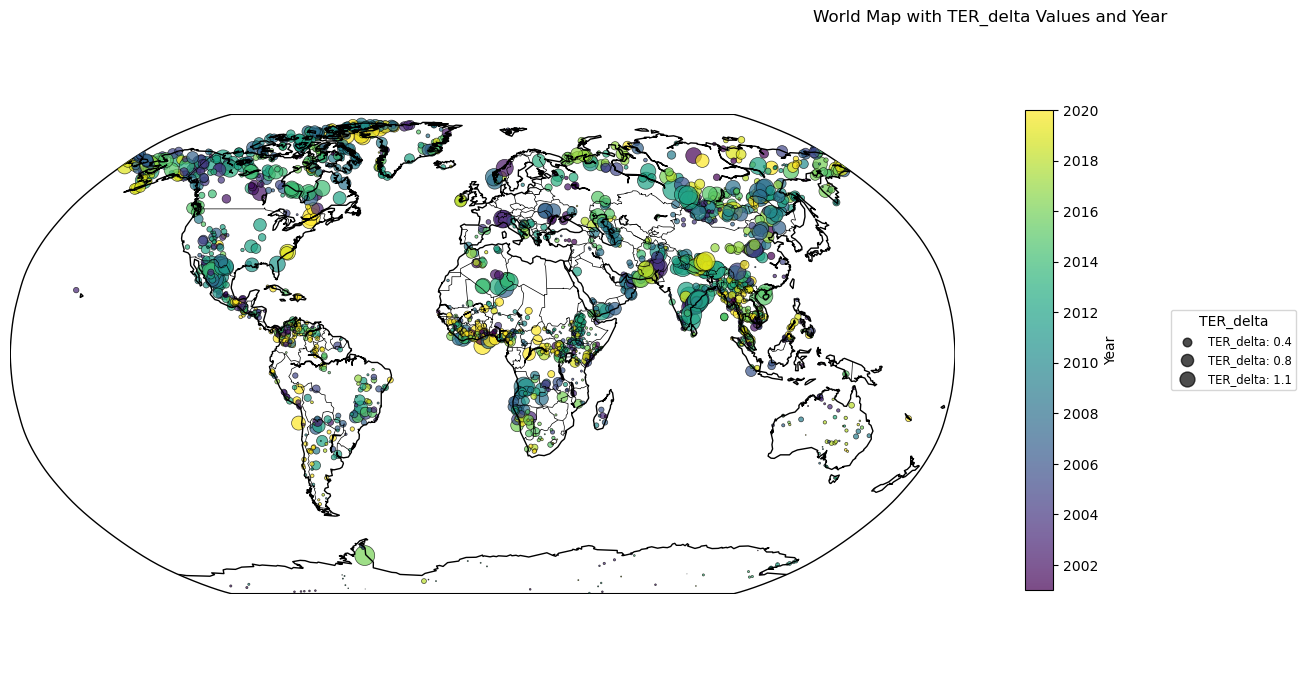

In [30]:
# Set up the figure and Basemap
plt.figure(figsize=(14, 8))  # Increase figure width for better space
m = Basemap(projection='robin', lon_0=0, resolution='c')

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Prepare the data
x, y = m(df_fluxcom['longitude_min'].values, df_fluxcom['latitude_min'].values)
sizes = df_fluxcom['TER_delta'] * 200  # Scale sizes for better visibility
colors = df_fluxcom['year']
cmap = plt.get_cmap('viridis')

# Scatter plot
scatter = m.scatter(x, y, c=colors, s=sizes, cmap=cmap, alpha=0.7, edgecolor='k', linewidth=0.5)

# Create a custom axes for the color bar
cbar_ax = plt.axes([0.85, 0.2, 0.02, 0.6])  # Adjust the position: [left, bottom, width, height]

# Add color bar with custom axes
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Year')

# Set color bar ticks to 2-year intervals
years = np.arange(2002, 2022, 2)
cbar.set_ticks(years)
cbar.set_ticklabels([str(year) for year in years])

# Determine max size and steps for size legend
max_ter = df_fluxcom['TER_delta'].max()
step_size = max_ter / 3  # Divide max GPP value into 3 steps

# Size legend values
size_values = [max_ter / 3, max_ter / 3 * 2, max_ter]  # Example: base size values, including max
sizes_legend = [val * 100 for val in size_values]  # Scale sizes for legend

# Create a new axis for the size legend
legend_ax = plt.axes([0.7, 0.1, 0.25, 0.8])  # Create a new axis for the legend
legend_ax.set_xlim(0, 1)
legend_ax.set_ylim(0, 1)
legend_ax.axis('off')  # Hide the axis

# Add the size legend to the new axis
for size, label in zip(sizes_legend, size_values):
    legend_ax.scatter([], [], c='k', alpha=0.7, s=size, label=f'TER_delta: {label:.1f}')

legend_ax.legend(title='TER_delta', loc='center left', bbox_to_anchor=(1, 0.5), scatterpoints=1, fontsize='small')

# Adjust layout to make room for the color bar and size legend
plt.subplots_adjust(right=0.8)  # Adjust right margin to accommodate the color bar

# Show plot
plt.title('World Map with TER_delta Values and Year')
plt.show()

/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


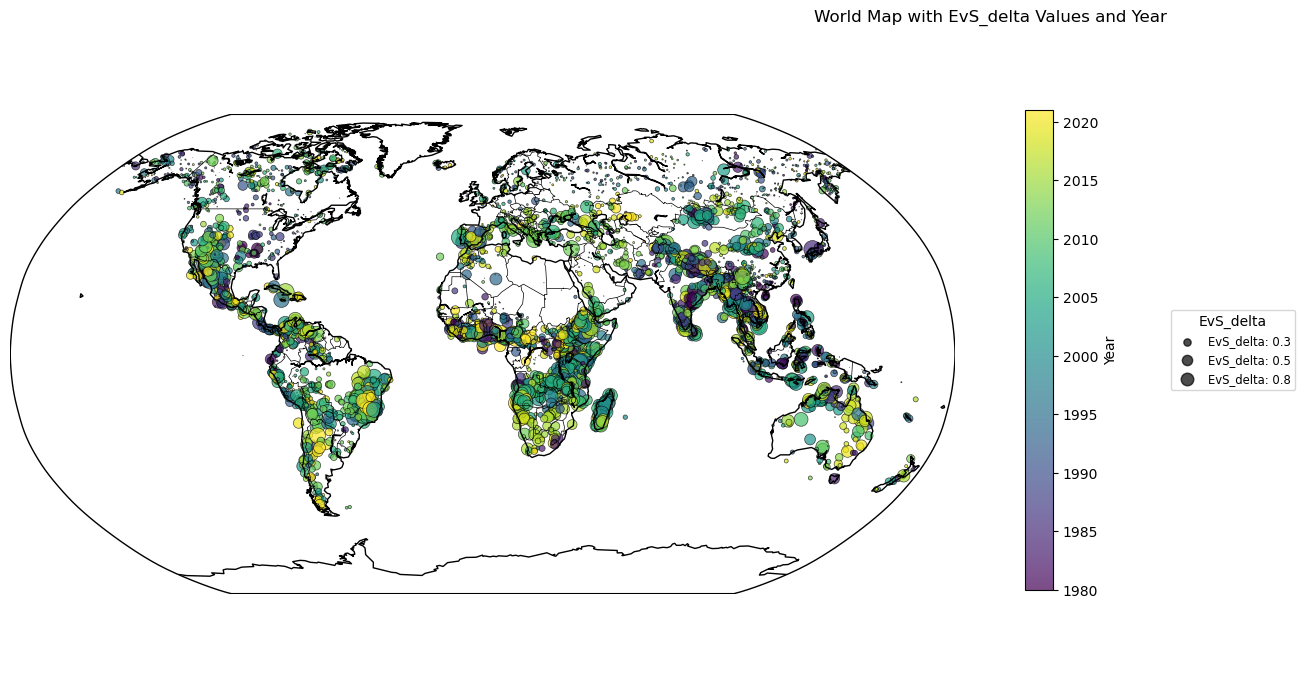

In [39]:
# Set up the figure and Basemap
plt.figure(figsize=(14, 8))  # Increase figure width for better space
m = Basemap(projection='robin', lon_0=0, resolution='c')

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Prepare the data
x, y = m(df_gleam['longitude_min'].values, df_gleam['latitude_min'].values)
sizes = df_gleam['EvS_delta'] * 200  # Scale sizes for better visibility
colors = df_gleam['year']
cmap = plt.get_cmap('viridis')

# Scatter plot
scatter = m.scatter(x, y, c=colors, s=sizes, cmap=cmap, alpha=0.7, edgecolor='k', linewidth=0.5)

# Create a custom axes for the color bar
cbar_ax = plt.axes([0.85, 0.2, 0.02, 0.6])  # Adjust the position: [left, bottom, width, height]

# Add color bar with custom axes
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Year')

# Set color bar ticks to 5-year intervals
years = np.arange(1980, 2022, 5)
cbar.set_ticks(years)
cbar.set_ticklabels([str(year) for year in years])

# Determine max size and steps for size legend
max_evs = df_gleam['EvS_delta'].max()
step_size = max_evs / 3  # Divide max GPP value into 3 steps

# Size legend values
size_values = [max_evs / 3, max_evs / 3 * 2, max_evs]  # Example: base size values, including max
sizes_legend = [val * 100 for val in size_values]  # Scale sizes for legend

# Create a new axis for the size legend
legend_ax = plt.axes([0.7, 0.1, 0.25, 0.8])  # Create a new axis for the legend
legend_ax.set_xlim(0, 1)
legend_ax.set_ylim(0, 1)
legend_ax.axis('off')  # Hide the axis

# Add the size legend to the new axis
for size, label in zip(sizes_legend, size_values):
    legend_ax.scatter([], [], c='k', alpha=0.7, s=size, label=f'EvS_delta: {label:.1f}')

legend_ax.legend(title='EvS_delta', loc='center left', bbox_to_anchor=(1, 0.5), scatterpoints=1, fontsize='small')

# Adjust layout to make room for the color bar and size legend
plt.subplots_adjust(right=0.8)  # Adjust right margin to accommodate the color bar

# Show plot
plt.title('World Map with EvS_delta Values and Year')
plt.show()

# 2. Correlation

Now we take a look at the correlations between the computed ecosystem response variables (delta values for GPP, TER and EvS) and the respective PEI drought indices (with different moving average windows).

In [20]:
## Compute correlation with drought indicators
corr_gpp_pei30 = df_fluxcom['GPP_delta'].corr(df_fluxcom['pei_30_min'])
corr_ter_pei30 = df_fluxcom['TER_delta'].corr(df_fluxcom['pei_30_min'])
corr_evs_pei30 = df_gleam['EvS_delta'].corr(df_gleam['pei_30_min'])

corr_gpp_pei90 = df_fluxcom['GPP_delta'].corr(df_fluxcom['pei_90_min'])
corr_ter_pei90 = df_fluxcom['TER_delta'].corr(df_fluxcom['pei_90_min'])
corr_evs_pei90 = df_gleam['EvS_delta'].corr(df_gleam['pei_90_min'])

corr_gpp_pei180 = df_fluxcom['GPP_delta'].corr(df_fluxcom['pei_180_min'])
corr_ter_pei180 = df_fluxcom['TER_delta'].corr(df_fluxcom['pei_180_min'])
corr_evs_pei180 = df_gleam['EvS_delta'].corr(df_gleam['pei_180_min'])

# Create a table for correlation matrix
corr_matrix_drought = pd.DataFrame(columns=['PEI30', 'PEI90', 'PEI180'], index=['GPP', 'TER', 'EvS'])

corr_matrix_drought.loc['GPP', 'PEI30'] = corr_gpp_pei30
corr_matrix_drought.loc['TER', 'PEI30'] = corr_ter_pei30
corr_matrix_drought.loc['EvS', 'PEI30'] = corr_evs_pei30

corr_matrix_drought.loc['GPP', 'PEI90'] = corr_gpp_pei90
corr_matrix_drought.loc['TER', 'PEI90'] = corr_ter_pei90
corr_matrix_drought.loc['EvS', 'PEI90'] = corr_evs_pei90

corr_matrix_drought.loc['GPP', 'PEI180'] = corr_gpp_pei180
corr_matrix_drought.loc['TER', 'PEI180'] = corr_ter_pei180
corr_matrix_drought.loc['EvS', 'PEI180'] = corr_evs_pei180

print('____Correlations of ecosystem response vs. drought indicators____')
print(corr_matrix_drought)
print('____Mean correlation per ecosystem vairable____')
print(corr_matrix_drought.mean(axis=1))
print('____Mean correlation per PEI parameter____')
print(corr_matrix_drought.mean())
print(f'Overall mean: {corr_matrix_drought.abs().mean().mean()}')#| echo: false

____Correlations of ecosystem response vs. drought indicators____
        PEI30     PEI90    PEI180
GPP -0.080649 -0.120805 -0.096283
TER -0.002114  0.033219  0.018175
EvS -0.129059 -0.169616 -0.187409
____Mean correlation per ecosystem vairable____
GPP   -0.099246
TER    0.016426
EvS   -0.162028
dtype: object
____Mean correlation per PEI parameter____
PEI30    -0.070607
PEI90    -0.085734
PEI180   -0.088506
dtype: object
Overall mean: 0.09303650031909032


We also look at the correlations between the ecosystem response variables and the properties duration and area of the extreme events.

In [4]:
## Compute correlation with blob sizes
corr_gpp_duration = df_fluxcom['GPP_delta'].corr(df_fluxcom['duration_days'])
corr_ter_duration = df_fluxcom['TER_delta'].corr(df_fluxcom['duration_days'])
corr_evs_duration = df_gleam['EvS_delta'].corr(df_gleam['duration_days'])

corr_gpp_area = df_fluxcom['GPP_delta'].corr(df_fluxcom['area'])
corr_ter_area = df_fluxcom['TER_delta'].corr(df_fluxcom['area'])
corr_evs_area = df_gleam['EvS_delta'].corr(df_gleam['area'])

# Create a table for correlation matrix
corr_matrix_sizes= pd.DataFrame(columns=['duration', 'area'], index=['GPP', 'TER', 'EvS'])

corr_matrix_sizes.loc['GPP', 'duration'] = corr_gpp_duration
corr_matrix_sizes.loc['TER', 'duration'] = corr_ter_duration
corr_matrix_sizes.loc['EvS', 'duration'] = corr_evs_duration

corr_matrix_sizes.loc['GPP', 'area'] = corr_gpp_area
corr_matrix_sizes.loc['TER', 'area'] = corr_ter_area
corr_matrix_sizes.loc['EvS', 'area'] = corr_evs_area

print('____Correlations of ecosystem response vs. blob sizes____')
print(corr_matrix_sizes)
print('____Mean correlation per ecosystem vairable____')
print(corr_matrix_sizes.mean(axis=1))
print('____Mean correlation per event size parameter____')
print(corr_matrix_sizes.mean())
print(f'Overall mean: {corr_matrix_sizes.abs().mean().mean()}')

____Correlations of ecosystem response vs. blob sizes____
     duration      area
GPP -0.011508 -0.071357
TER   0.01078   0.02798
EvS  0.022614  0.048827
____Mean correlation per ecosystem vairable____
GPP   -0.041433
TER     0.01938
EvS     0.03572
dtype: object
____Mean correlation per event size parameter____
duration    0.007295
area        0.001817
dtype: object
Overall mean: 0.03217764996861122


# 3. Continent-wise correlations

## 3.1 Assign events to a continent

Now we assign to each event the respective continent where it takes place. For events that are located on more than one continent, the continent on which the larger percentage of the event is located is selected.

In [6]:
# Load the world shapefile from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# For Fluxcom
# Adjust longitude values to handle the -180 to 180 range
df_fluxcom['longitude_min'] = df_fluxcom['longitude_min'].apply(lambda x: x if x <= 180 else x - 360)
df_fluxcom['longitude_max'] = df_fluxcom['longitude_max'].apply(lambda x: x if x <= 180 else x - 360)

def create_event_polygon(row):
    """Create a polygon from the event's latitude and longitude."""
    return Polygon([
        (row['longitude_min'], row['latitude_min']),
        (row['longitude_max'], row['latitude_min']),
        (row['longitude_max'], row['latitude_max']),
        (row['longitude_min'], row['latitude_max']),
    ])

def assign_continent(row):
    """Assign the most frequently intersecting continent to the event based on its polygon."""
    event_polygon = create_event_polygon(row)
    intersecting_continents = []

    for _, continent in world.iterrows():
        if event_polygon.intersects(continent.geometry):
            intersecting_continents.append(continent['continent'])  # Collect all intersecting continents
    
    if intersecting_continents:
        # Determine the most frequent intersecting continent
        return Counter(intersecting_continents).most_common(1)[0][0]
    else:
        return None  # Return None if no continents intersect

# Apply the function to assign the most frequent continent
df_fluxcom['largest_continent'] = df_fluxcom.apply(assign_continent, axis=1)

# For gleam
# Adjust longitude values to handle the -180 to 180 range
df_gleam['longitude_min'] = df_gleam['longitude_min'].apply(lambda x: x if x <= 180 else x - 360)
df_gleam['longitude_max'] = df_gleam['longitude_max'].apply(lambda x: x if x <= 180 else x - 360)

def create_event_polygon(row):
    """Create a polygon from the event's latitude and longitude."""
    return Polygon([
        (row['longitude_min'], row['latitude_min']),
        (row['longitude_max'], row['latitude_min']),
        (row['longitude_max'], row['latitude_max']),
        (row['longitude_min'], row['latitude_max']),
    ])

def assign_continent(row):
    """Assign the most frequently intersecting continent to the event based on its polygon."""
    event_polygon = create_event_polygon(row)
    intersecting_continents = []

    for _, continent in world.iterrows():
        if event_polygon.intersects(continent.geometry):
            intersecting_continents.append(continent['continent'])  # Collect all intersecting continents
    
    if intersecting_continents:
        # Determine the most frequent intersecting continent
        return Counter(intersecting_continents).most_common(1)[0][0]
    else:
        return None  # Return None if no continents intersect

# Apply the function to assign the most frequent continent
df_gleam['largest_continent'] = df_gleam.apply(assign_continent, axis=1)

/tmp/ipykernel_468/31476613.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


## 3.2 Continent-wise correlations with PEIs

In [14]:
# Define the periods for PEIs
pei_periods = [30, 90, 180]

# Initialize a dictionary to store the results
continent_corrs = {
    'GPP_PEIs': {},
    'TER_PEIs': {},
    'EvS_PEIs': {}
}
# Group by 'continent' and compute correlations for each group
for continent, group in df_fluxcom.groupby('largest_continent'):
    continent_corrs['GPP_PEIs'][continent] = {}
    continent_corrs['TER_PEIs'][continent] = {}
    for pei in pei_periods:
        corr_gpp = group['GPP_delta'].corr(group[f'pei_{pei}_mean'])
        corr_ter = group['TER_delta'].corr(group[f'pei_{pei}_mean'])
        continent_corrs['GPP_PEIs'][continent][f'pei_{pei}'] = corr_gpp
        continent_corrs['TER_PEIs'][continent][f'pei_{pei}'] = corr_ter

for continent, group in df_gleam.groupby('largest_continent'):
    continent_corrs['EvS_PEIs'][continent] = {}
    for pei in pei_periods:
        corr_evs = group['EvS_delta'].corr(group[f'pei_{pei}_mean'])
        continent_corrs['EvS_PEIs'][continent][f'pei_{pei}'] = corr_evs
        
# Print the results
for key, value in continent_corrs.items():
    print(f"____Correlation results for {key}:____")
    for continent, corrs in value.items():
        print(f"  {continent}:")
        for pei, corr in corrs.items():
            print(f"    {pei}: {corr}")

____Correlation results for GPP_PEIs:____
  Africa:
    pei_30: 0.08620745187874006
    pei_90: 0.11074954557435135
    pei_180: 0.1452228995552068
  Antarctica:
    pei_30: -0.2981370581549792
    pei_90: -0.07296814979877767
    pei_180: -0.04793673766372653
  Asia:
    pei_30: 0.033298275425558105
    pei_90: -0.051509383312980356
    pei_180: -0.03224770420221282
  Europe:
    pei_30: 0.08374276021930145
    pei_90: 0.06617231542806933
    pei_180: 0.03418258646128389
  North America:
    pei_30: -0.1112264584645062
    pei_90: -0.10516274938313803
    pei_180: -0.11465067051199442
  Oceania:
    pei_30: -0.45220740499718637
    pei_90: -0.5776238332659069
    pei_180: -0.591838949220662
  South America:
    pei_30: -0.06958365813335372
    pei_90: -0.18315521053383896
    pei_180: -0.21040764056641717
____Correlation results for TER_PEIs:____
  Africa:
    pei_30: 0.03449767493805898
    pei_90: 0.14015125401524728
    pei_180: 0.26239022501227527
  Antarctica:
    pei_30: -0.2725

/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


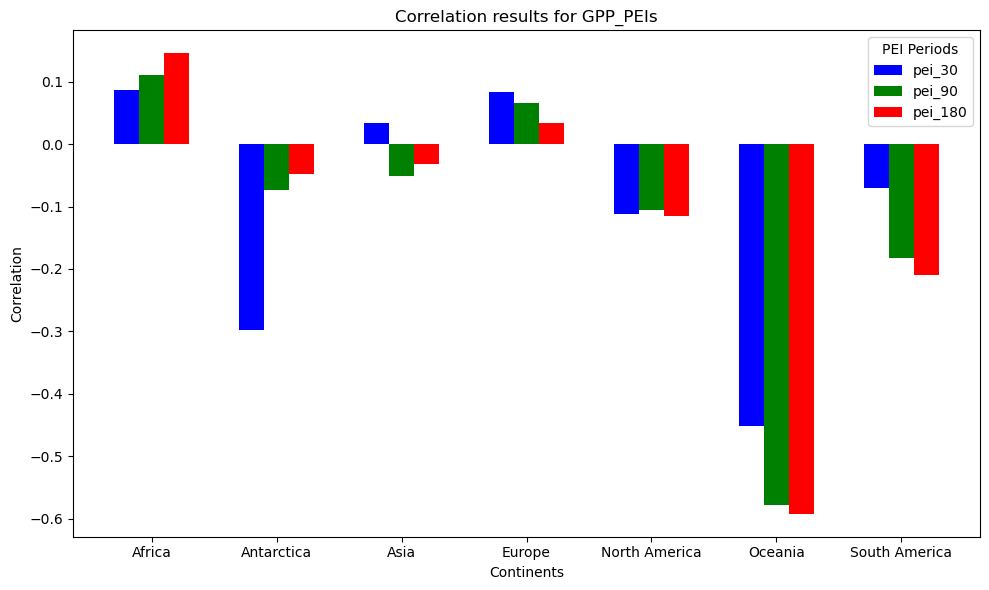

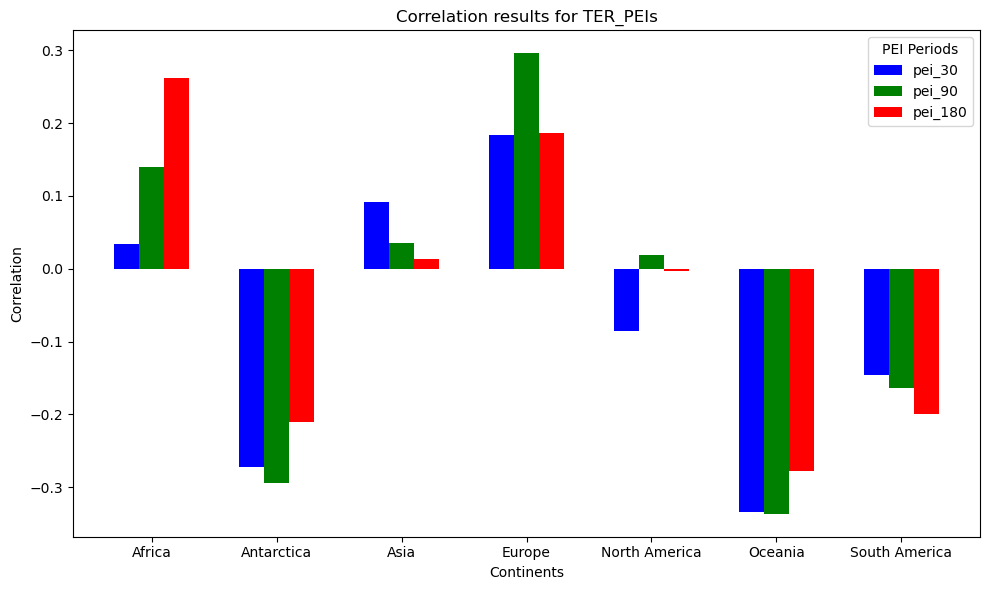

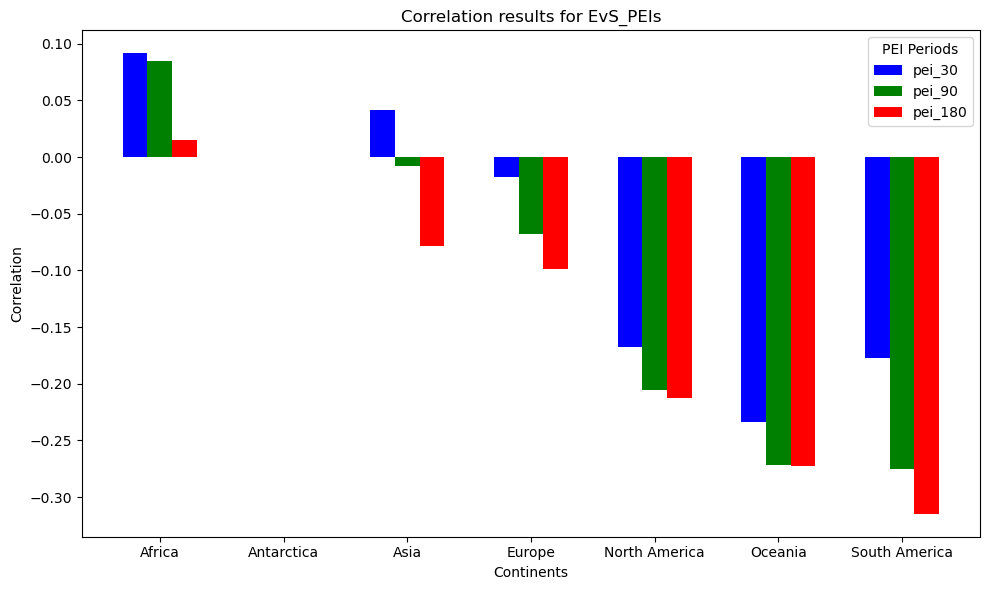

In [42]:
#| echo: false

# Define colors for different PEI periods
colors = ['b', 'g', 'r']

# Define a function to create the bar plot and save it
def plot_correlations(continent_corrs, title, filename):
    # Extract the keys (continents) and the number of PEI periods
    continents = list(continent_corrs.keys())
    pei_periods = ['pei_30', 'pei_90', 'pei_180']

    # Prepare the data for plotting
    data = {pei: [continent_corrs[continent][pei] for continent in continents] for pei in pei_periods}
    
    # Create the plot
    x = np.arange(len(continents))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create bars for each PEI period
    for i, pei in enumerate(pei_periods):
        ax.bar(x + i * width, data[pei], width, label=pei, color=colors[i])

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_xlabel('Continents')
    ax.set_ylabel('Correlation')
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(continents)
    ax.legend(title='PEI Periods')

    fig.tight_layout()

# Plot the results for each key and save/display the plots
for key, value in continent_corrs.items():
    plot_correlations(value, f"Correlation results for {key}", filename)

### Plot some results

<Figure size 1200x800 with 0 Axes>

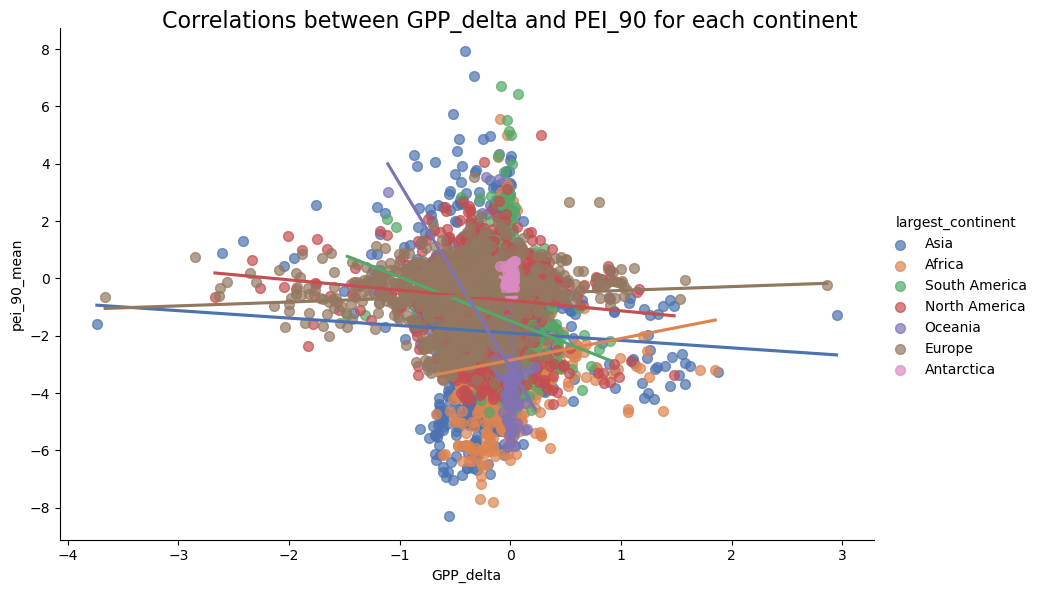

In [11]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.lmplot(
    data=df_fluxcom, 
    x='GPP_delta', 
    y='pei_90_mean', 
    hue='largest_continent',
    palette='deep',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 50, 'alpha': 0.7},
    ci=None
)

scatter_plot.fig.suptitle('Correlations between GPP_delta and PEI_90 for each continent', fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust the top of the plot to make room for the title

plt.show()

<Figure size 1200x800 with 0 Axes>

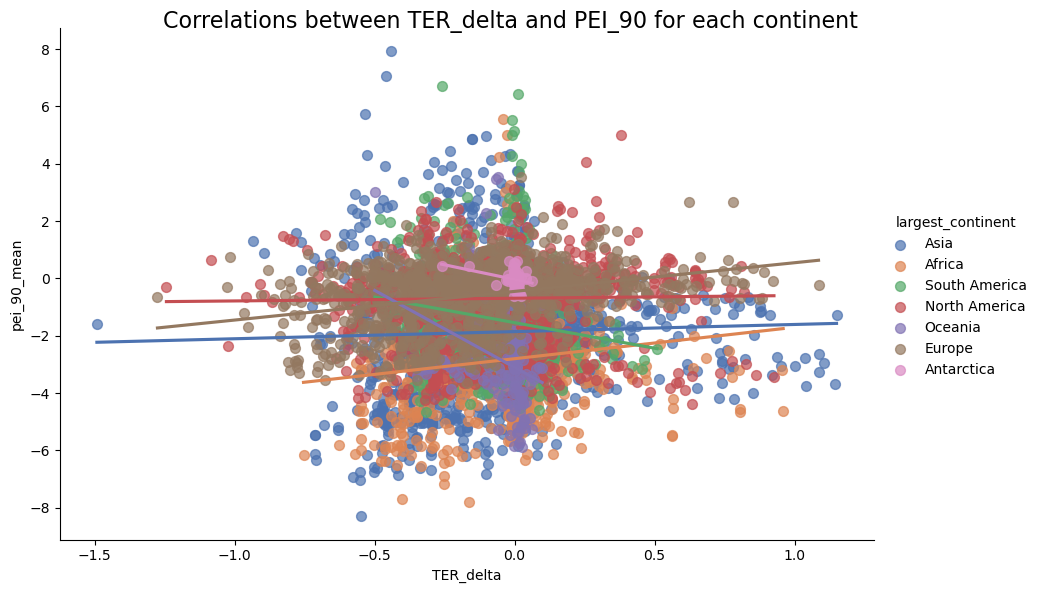

In [12]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.lmplot(
    data=df_fluxcom, 
    x='TER_delta', 
    y='pei_90_mean', 
    hue='largest_continent',
    palette='deep',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 50, 'alpha': 0.7}, 
    ci=None 
)


scatter_plot.fig.suptitle('Correlations between TER_delta and PEI_90 for each continent', fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust the top of the plot to make room for the title

plt.show()

<Figure size 1200x800 with 0 Axes>

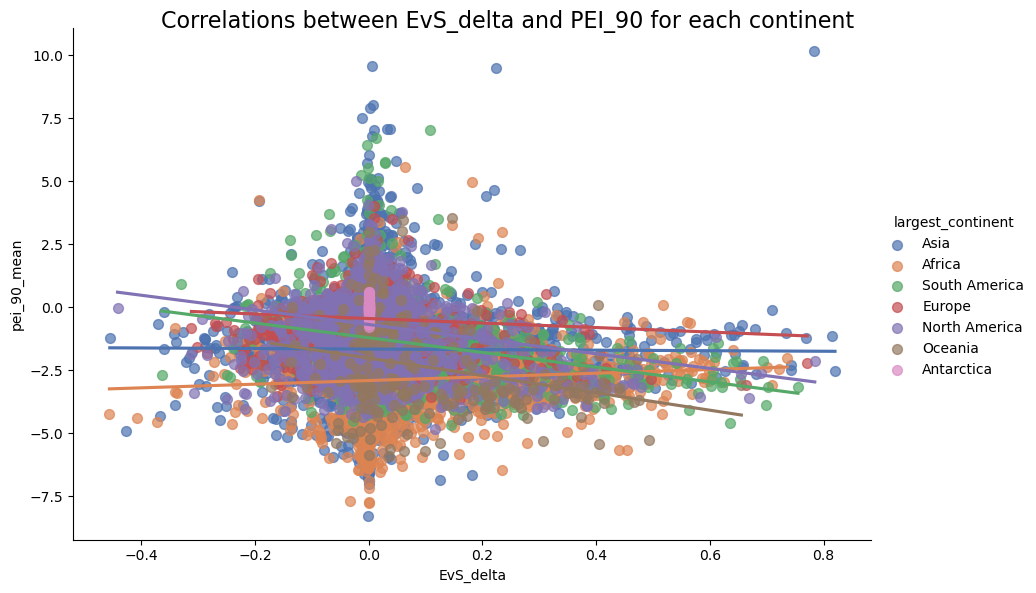

In [13]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.lmplot(
    data=df_gleam, 
    x='EvS_delta', 
    y='pei_90_mean', 
    hue='largest_continent',
    palette='deep',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 50, 'alpha': 0.7}, 
    ci=None
)


scatter_plot.fig.suptitle('Correlations between EvS_delta and PEI_90 for each continent', fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust the top of the plot to make room for the title

plt.show()

## 3.3 Continent-wise correlations with event size parameters

In [44]:
# Define the periods for event size parameters
properties = ['duration_days', 'area']

# Initialize a dictionary to store the results
continent_corrs = {
    'GPP_properties': {},
    'TER_properties': {},
    'EvS_properties': {}
}

# Group by 'largest_continent' and compute correlations for each group
# For df_fluxcom DataFrame
for continent, group in df_fluxcom.groupby('largest_continent'):
    continent_corrs['GPP_properties'][continent] = {}
    continent_corrs['TER_properties'][continent] = {}
    for prop in properties:
        corr_gpp = group['GPP_delta'].corr(group[prop])
        corr_ter = group['TER_delta'].corr(group[prop])
        continent_corrs['GPP_properties'][continent][prop] = corr_gpp
        continent_corrs['TER_properties'][continent][prop] = corr_ter

# For df_gleam DataFrame
for continent, group in df_gleam.groupby('largest_continent'):
    continent_corrs['EvS_properties'][continent] = {}
    for prop in properties:
        corr_evs = group['EvS_delta'].corr(group[prop])
        continent_corrs['EvS_properties'][continent][prop] = corr_evs

# Print the results
for key, value in continent_corrs.items():
    print(f"Correlation results for {key}:")
    for continent, corrs in value.items():
        print(f"  {continent}:")
        for prop, corr in corrs.items():
            print(f"    {prop}: {corr}")

Correlation results for GPP_properties:
  Africa:
    duration_days: 0.29375022373287174
    area: 0.36169411986640737
  Antarctica:
    duration_days: 0.1838705373312725
    area: -0.11799552768435097
  Asia:
    duration_days: -0.11966385714621566
    area: -0.2637959262300692
  Europe:
    duration_days: -0.20519020441013858
    area: -0.17037852230634762
  North America:
    duration_days: -0.016914053802964926
    area: -0.11504206861876576
  Oceania:
    duration_days: -0.3043371812254034
    area: 0.023637715782977374
  South America:
    duration_days: 0.03718193052349404
    area: 0.22402916019019897
Correlation results for TER_properties:
  Africa:
    duration_days: 0.258403402204057
    area: 0.3033405856283164
  Antarctica:
    duration_days: -0.01268452963273256
    area: -0.04988891811008264
  Asia:
    duration_days: -0.09377044061334296
    area: -0.11816599598240737
  Europe:
    duration_days: -0.12093677096887442
    area: -0.009233081577201015
  North America:
    

/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/jasminkrebs/.conda/envs/blobs/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


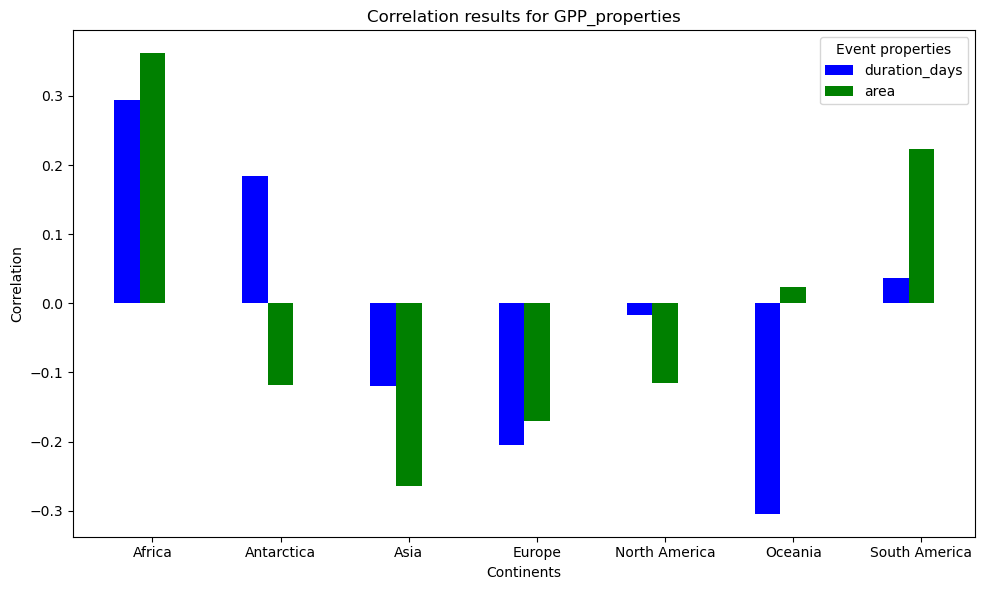

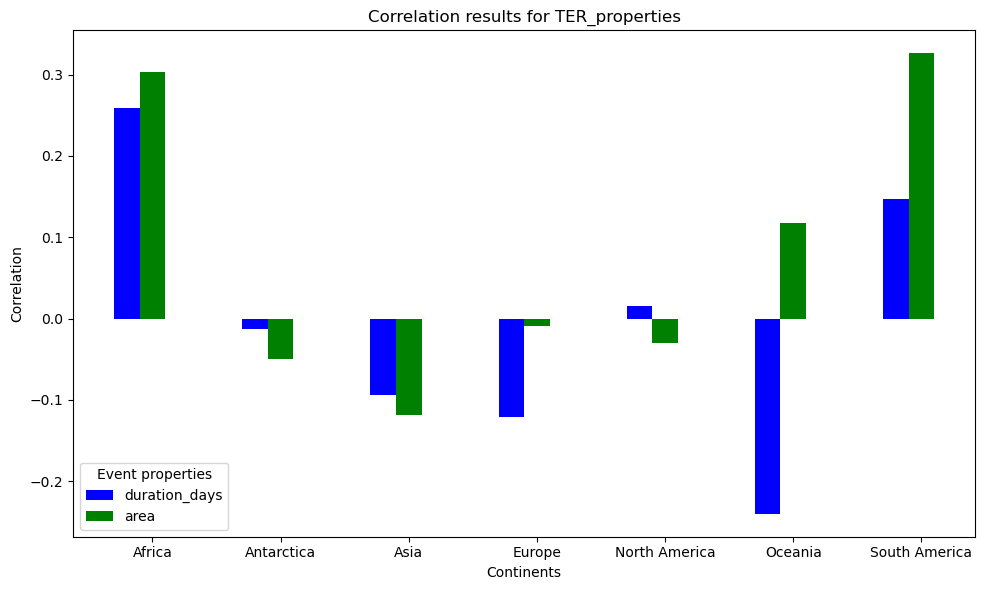

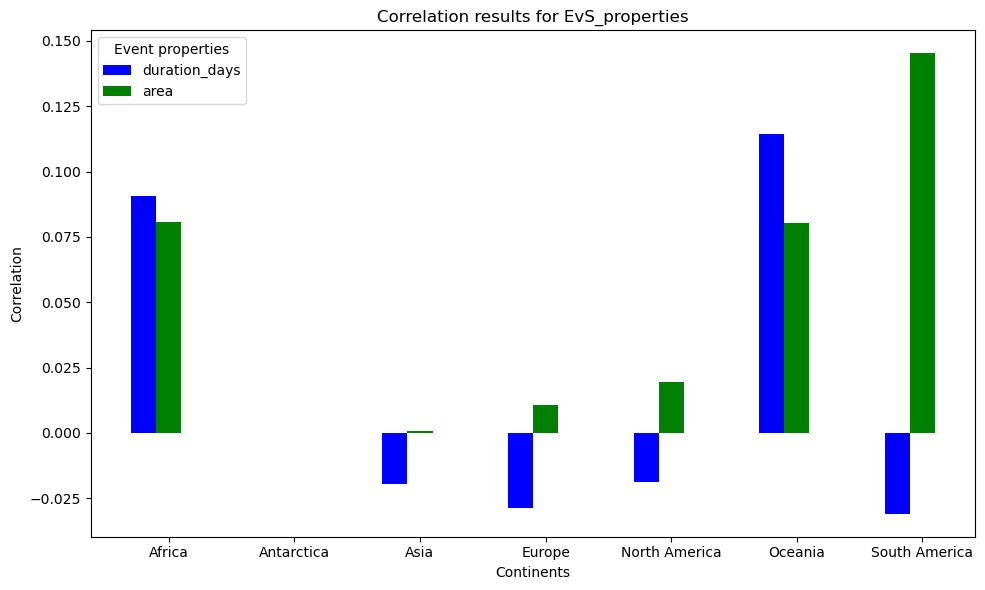

In [41]:
#| echo: false

# Define colors for different event properties
colors = ['b', 'g']

# Define a function to create the bar plot and save it
def plot_correlations_prop(continent_corrs_prop, title, filename):
    # Extract the keys (continents) and the properties
    continents = list(continent_corrs_prop.keys())
    prop = ['duration_days', 'area']

    # Prepare the data for plotting
    data = {p: [continent_corrs_prop[continent][p] for continent in continents] for p in prop}
    
    # Create the plot
    x = np.arange(len(continents))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create bars for each event property
    for i, p in enumerate(prop):
        ax.bar(x + i * width, data[p], width, label=p, color=colors[i])

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_xlabel('Continents')
    ax.set_ylabel('Correlation')
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(continents)
    ax.legend(title='Event properties')

    fig.tight_layout()

    # Save the figure in the output folder
    #file_path = os.path.join(output_folder, filename)
    #plt.savefig(file_path)
    #plt.close(fig)

# Plot the results for each key and save/display the plots
for key, value in continent_corrs_prop.items():
    plot_correlations_prop(value, f"Correlation results for {key}", filename)